In [111]:
import pandas as pd 
df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [113]:
df.head()
len(df)

891

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle=df.copy()
dfle['sex_n'] = le.fit_transform(dfle['Sex'])

In [115]:
dfle=dfle.drop(['Sex'],axis='columns')
dfle

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [116]:
dfle.isna().any()

Survived    False
Pclass      False
Age          True
Fare        False
sex_n       False
dtype: bool

In [117]:
import math
median_age=math.floor(df['Age'].median())
dfle['Age']=dfle['Age'].fillna(median_age)
dfle

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,28.0,23.4500,0
889,1,1,26.0,30.0000,1


In [118]:
y=dfle['Survived']
X=dfle.drop(['Survived'],axis='columns')

In [119]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [121]:
len(X_test)

90

In [122]:
len(X_train)

801

In [123]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [124]:
model.score(X_test,y_test)

0.8333333333333334

In [125]:
y_test.tail()

736    0
884    0
214    0
173    0
875    1
Name: Survived, dtype: int64

In [126]:
model.predict(X_test.tail())
y_pred=model.predict(X_test)

In [127]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'truth')

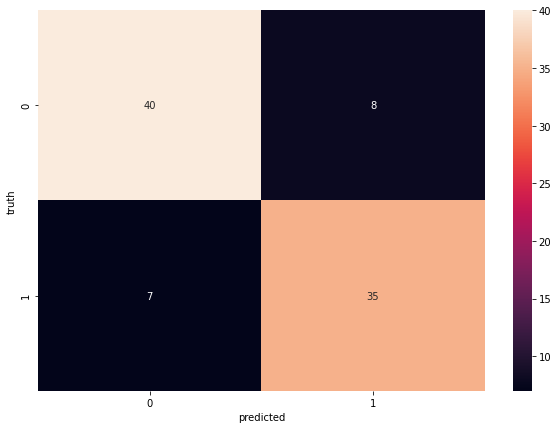

In [128]:
plt.figure(figsize=(10,7))
sn.heatmap(cf,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')